# Intensity Modulation and Direct Detection


## IM/DD Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from IMDD import IMDDModel, IMDDParams, helpers

params = IMDDParams(
    N=50000,
    n_taps=7,
    alphabet=torch.tensor([-3., -1., 1., 3.]),
    oversampling_factor=3,
    baudrate=112000000000,
    wavelength=0.000001270,
    dispersion_parameter=-0.000005,
    fiber_length=4000,
    noise_power_gain_db=22,
    roll_off=0.2,
    bias=2.2)
link = IMDDModel(params)

print("Link parameters: ", params)
print("Link: ", link)

Link parameters:  IMDDParams(N=50000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112000000000, wavelength=1.27e-06, dispersion_parameter=-5e-06, fiber_length=4000, noise_power_gain_db=22, roll_off=0.2, bias=2.2)
Link:  IMDDModel(
  IMDDParams(N=50000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112000000000, wavelength=1.27e-06, dispersion_parameter=-5e-06, fiber_length=4000, noise_power_gain_db=22, roll_off=0.2, bias=2.2)
  (transmitter): Transmitter()
  (channel): OpticalChannel()
  (receiver): Receiver()
)


In [2]:
# Create messages to send
messages = link.source()
print("Messages:\n", messages, messages.shape)

# Each of those messages correspond to a pair of bits
grey_labels = helpers.get_graylabel(2)
print("Grey bits:\n", grey_labels)

# bits that get sent
bits = grey_labels[messages]
print("Bits to send:\n", bits, bits.shape)

Messages:
 tensor([1, 0, 1,  ..., 3, 1, 0]) torch.Size([50000])
Grey bits:
 [[0 0]
 [0 1]
 [1 1]
 [1 0]]
Bits to send:
 [[0 1]
 [0 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [0 0]] (50000, 2)


In [3]:
received_symbols = link(messages)
print("Received (impaird) symbols:\n", received_symbols, received_symbols.shape)

Received (impaird) symbols:
 tensor([[1.3022, 1.6318, 1.1422,  ..., 0.8866, 1.8171, 5.4610],
        [4.8358, 1.3022, 1.6318,  ..., 1.5923, 0.8866, 1.8171],
        [4.3833, 4.8358, 1.3022,  ..., 1.1422, 1.5923, 0.8866],
        ...,
        [1.5923, 0.8866, 1.8171,  ..., 3.5574, 0.9554, 3.0522],
        [1.1422, 1.5923, 0.8866,  ..., 5.4610, 3.5574, 0.9554],
        [1.6318, 1.1422, 1.5923,  ..., 1.8171, 5.4610, 3.5574]]) torch.Size([50000, 7])


/tmp/ipykernel_822949/1897460151.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_yticklabels([r"\texttt{00}", r"\texttt{01}", "11", "10"])
/tmp/ipykernel_822949/1897460151.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(["00", "01", "11", "10"])


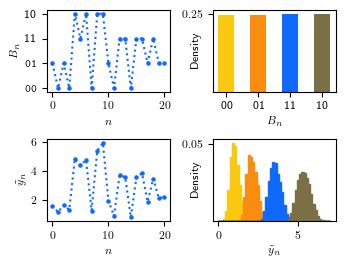

In [32]:
color = ["#FAC90F", "#FA8D0F", "#0F69FA", "#7A6F45"]

#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 8,
          }
plt.rcParams.update(params) 

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(3.5, 2.7))
axs[0, 0].scatter(np.arange(0, 21), messages[:21].numpy(), color=color[2], s=5)
axs[0, 0].plot(np.arange(0, 21), messages[:21].numpy(), ls=":", color=color[2])
axs[0, 0].set_ylabel("$B_n$")
axs[0, 0].yaxis.set_label_coords(-0.1, 0.5)
axs[0, 0].set_xlabel("$n$")
axs[0, 0].set_yticklabels([r"\texttt{00}", r"\texttt{01}", r"\texttt{11}", r"\texttt{10}"])
axs[0, 0].set_yticks([0, 1, 2, 3])

labels, counts = np.unique(messages[messages == 0].numpy(), return_counts=True)
axs[0, 1].set_ylabel("Density")
axs[0, 1].set_yticks([0.25])
axs[0, 1].yaxis.set_label_coords(-0.1, 0.5)
axs[0, 1].set_xlabel("$B_n$")
for i in range(4):
    labels, counts = np.unique(messages[messages == i].numpy(), return_counts=True)
    axs[0, 1].bar(labels, counts / 50000, align='center', width=0.5, color=color[i])
axs[0, 1].set_xticklabels([r"\texttt{00}", r"\texttt{01}", r"\texttt{11}", r"\texttt{10}"])
axs[0, 1].set_xticks([0, 1, 2, 3])

axs[1, 0].scatter(np.arange(21), received_symbols[:21, 3], color=color[2], s=5)
axs[1, 0].plot(received_symbols[:21, 3], ":", color=color[2])
axs[1, 0].set_ylabel(r"$\tilde{y}_n$")
axs[1, 0].set_xlabel("$n$")
for i in range(4):
    (counts, bins) = np.histogram(received_symbols[:, 3].numpy()[messages == i], bins=np.linspace(0, 7, 51))
    axs[1, 1].hist(bins[:-1], bins, weights=counts / 50000,
    linewidth=1, alpha=1, histtype="stepfilled", edgecolor=color[i], color=color[i])
axs[1, 1].set_ylabel("Density")
axs[1, 1].set_yticks([0.05])
axs[1, 1].yaxis.set_label_coords(-0.1, 0.5)
axs[1, 1].set_xlabel(r"$\tilde{y}_n$")

plt.tight_layout()
plt.savefig("./imdd.pgf")

In [5]:
from IMDD import PAM4IMDD

params = IMDDParams(
    N=50000,
    n_taps=7,
    alphabet=torch.tensor([-3., -1., 1., 3.]),
    oversampling_factor=3,
    baudrate=112000000000,
    wavelength=0.000001270,
    dispersion_parameter=-0.000005,
    fiber_length=4000,
    noise_power_gain_db=22,
    roll_off=0.2,
    bias=2.2)
dataset = PAM4IMDD(params, bit_level=False)

data, targets = dataset[42]
print(data, targets)

tensor([1.8319, 1.0458, 5.3803, 5.6211, 5.8782, 5.5184, 0.8227]) tensor(3)


## Dataset